In [1]:
from utils import align_face, face_morph
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np	

/Users/oliverlundin/miniforge3/envs/facemorphing/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
anna_path = 'images/anna.jpg'
filip_path = 'images/filip.jpg'

emma_path = 'images/emma.jpg'
oliver_path = 'images/oliver.jpg'

vilma_path = 'images/vilma.jpg'
emma_path = 'images/emma.jpg'

vilma_path = 'images/vilma.jpg'
oliver_path = 'images/oliver.jpg'

pier_path = 'images/pier.jpg'
tom_path = 'images/georgeClooney.jpg'

# create a list
pairs = [
	(anna_path, filip_path),
	(emma_path, oliver_path),
	(vilma_path, emma_path),
	(vilma_path, oliver_path),
	(pier_path, tom_path)
]

In [3]:
# align all faces

aligned_pairs = []
for pair in pairs:
	aligned_pair = []
	for path in pair:
		path = Image.open(path)
		aligned_pair.append(align_face(path))
	aligned_pairs.append(aligned_pair)

print(aligned_pairs)

[[<PIL.Image.Image image mode=RGB size=256x256 at 0x286733250>, <PIL.Image.Image image mode=RGB size=256x256 at 0x16C455EE0>], [<PIL.Image.Image image mode=RGB size=256x256 at 0x16C3CF280>, <PIL.Image.Image image mode=RGB size=256x256 at 0x2865A1100>], [<PIL.Image.Image image mode=RGB size=256x256 at 0x16C413FD0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x3BDC3B3A0>], [<PIL.Image.Image image mode=RGB size=256x256 at 0x3BC3F33D0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x3BC3F35E0>], [<PIL.Image.Image image mode=RGB size=256x256 at 0x3BC3F3D60>, <PIL.Image.Image image mode=RGB size=256x256 at 0x3BC3F3F10>]]


In [4]:
# traverse aligned pairs
morphed = []
for i, pair in enumerate(aligned_pairs):
	# morph faces
	morphed.append(face_morph(pair[0], pair[1], 500, False))
	

MPS is available
Computing W midpoint and stddev using 10000 samples...
step    1/500: dist 0.57 loss 4105.66
step    2/500: dist 0.59 loss 5536.91
step    3/500: dist 0.63 loss 5158.41
step    4/500: dist 0.56 loss 4499.16
step    5/500: dist 0.54 loss 3696.54
step    6/500: dist 0.56 loss 2882.20
step    7/500: dist 0.54 loss 2177.70
step    8/500: dist 0.52 loss 1679.15
step    9/500: dist 0.51 loss 1400.56
step   10/500: dist 0.52 loss 1334.53
step   11/500: dist 0.51 loss 1372.84
step   12/500: dist 0.49 loss 1365.69
step   13/500: dist 0.46 loss 1271.81
step   14/500: dist 0.48 loss 1136.51
step   15/500: dist 0.44 loss 1024.98
step   16/500: dist 0.40 loss 938.09
step   17/500: dist 0.43 loss 900.73
step   18/500: dist 0.42 loss 918.96
step   19/500: dist 0.43 loss 918.28
step   20/500: dist 0.40 loss 854.56
step   21/500: dist 0.44 loss 802.67
step   22/500: dist 0.43 loss 839.30
step   23/500: dist 0.44 loss 862.98
step   24/500: dist 0.42 loss 756.37
step   25/500: dist 0.40 

In [5]:
# morphed is a list of images containing lists of images
# insert the first image of each pair in the aligned_pairs list in the first position of the each list in the morphed list
# insert the second image of each pair in the aligned_pairs list in the last position of the each list in the morphed list
# this is done to be able to plot the images in the morphed list
for i, pair in enumerate(aligned_pairs):
	morphed[i] = np.insert(morphed[i],0, pair[0], axis=0)
	morphed[i] = np.insert(morphed[i],len(morphed[i]), pair[1], axis=0)


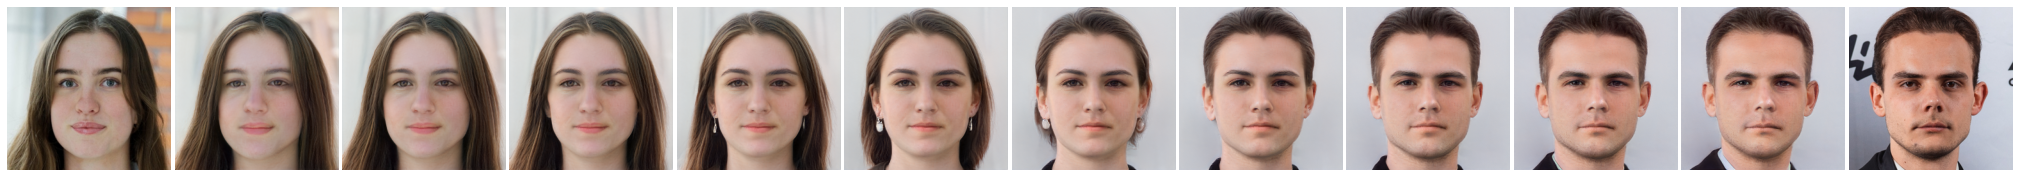

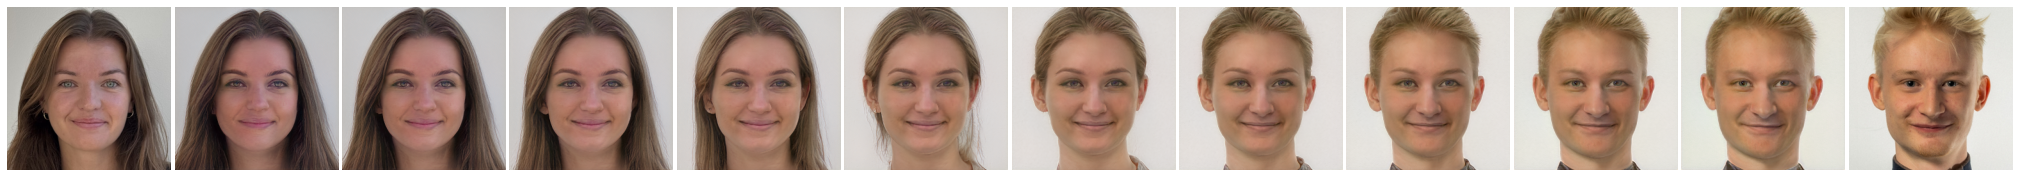

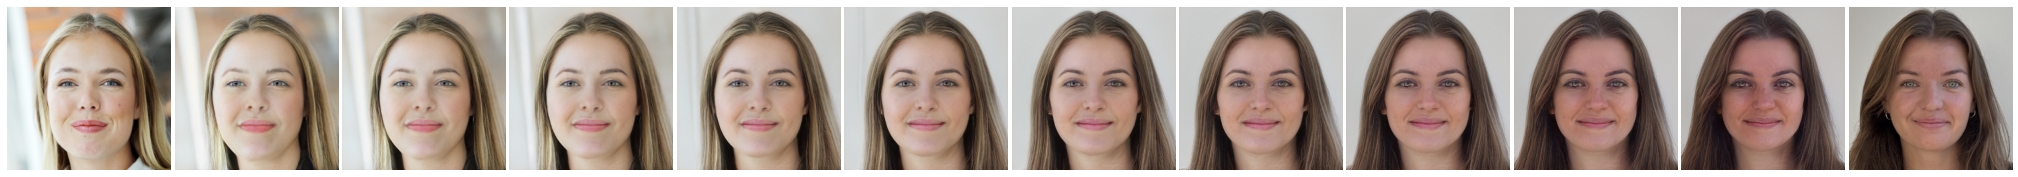

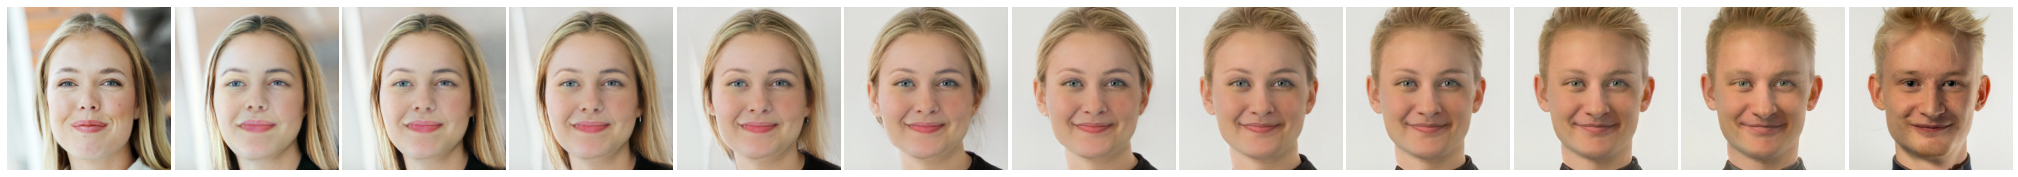

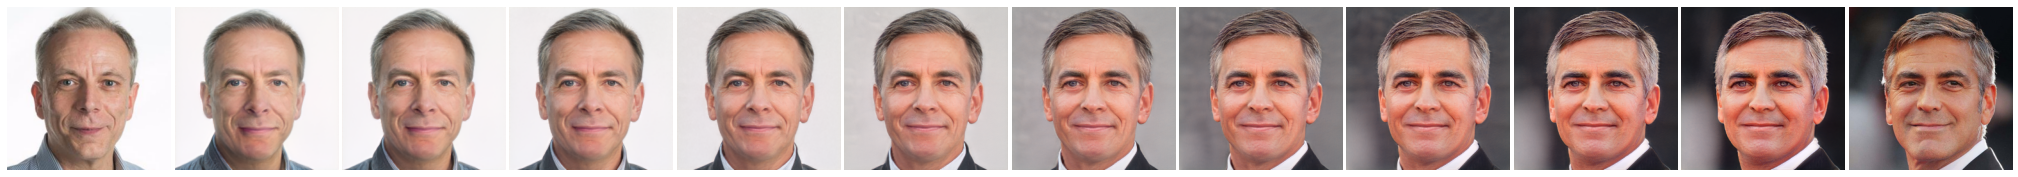

In [6]:
# morphed is a list of images containing lists of images
# each list of images is a morphing sequence between two images
# let's plot the first morphing sequence
for i, morphing in enumerate(morphed):
	fig, ax = plt.subplots(1, len(morphing), figsize=(len(morphing) * 3, 3))
	for j, img in enumerate(morphing):
		ax[j].imshow(img)
		ax[j].axis('off')
		ax[j].set_frame_on(False)
	plt.subplots_adjust(wspace=0, hspace=0)
	plt.show()
	fig.savefig('output/morphing' + str(i) + '.png')
